<a href="https://colab.research.google.com/github/xlxusxls/Autonomous-AI/blob/Week-7/Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

## 경사하강법을 이용한 구현

1.2532418085611319 2.745502230882486
[2.74550223 3.99874404 5.25198585]


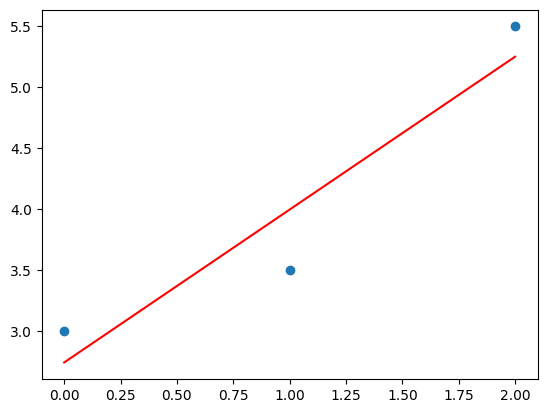

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([0.0, 1.0, 2.0])
y = np.array([3.0, 3.5, 5.5])
W = 0			# 기울기
b = 0  			# 절편
lrate = 0.01		# 학습률
epochs = 1000		# 반복 횟수
n = float(len(X))		# 입력 데이터 개수

# 경사 하강법
for i in range(epochs):
    y_pred = W*X + b			# 예측값
    dW = (2/n) * sum(X * (y_pred-y))  # 넘파이 배열 처리(데이터 3개에 대한 합)
    db = (2/n) * sum(y_pred-y)
    W = W - lrate * dW 		# 기울기 갱신
    b = b - lrate * db 			# 절편 갱신

print(W, b)	# 기울기, 절편 출력
y_pred = W*X + b	# 예측값
print(y_pred)

plt.scatter(X, y)
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')	# 예측값 그래프
plt.show()

## 선형 회귀 구현: Scikit-learn 이용

[1.25] 2.7500000000000004


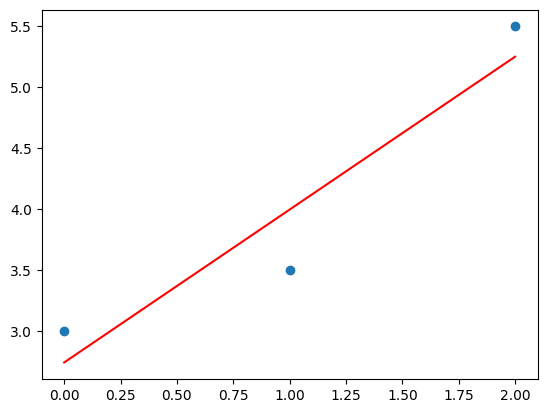

In [2]:
# 관련 모듈
import matplotlib.pylab as plt
from sklearn import linear_model

# 선형 회귀 모델 생성
reg = linear_model.LinearRegression()

# 데이터는 파이썬의 리스트 또는 넘파이 배열 이용 (넘파이 권장)
X = [[0], [1], [2]]	# 반드시 2차원 리스트 또는 배열로 만들어야 함
y = [3, 3.5, 5.5] 	# y = x + 3

# 학습
reg.fit(X, y)
print(reg.coef_, reg.intercept_)

plt.scatter(X, y)
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')	# 예측값 그래프
plt.show()

### 선형 회귀 예

[74.69188821 56.64723926 45.16428085 36.96216769 84.53442399]
[67.30998637]


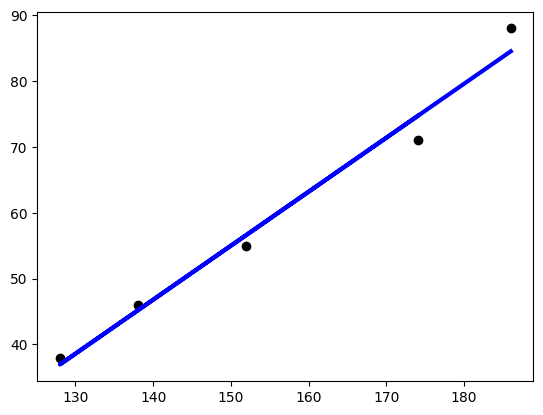

In [3]:
import matplotlib.pylab as plt
from sklearn import linear_model

X = [[174], [152], [138], [128], [186]]
y = [71, 55, 46, 38, 88]

reg = linear_model.LinearRegression()
reg.fit(X, y)

# 학습 데이터와 y 값의 산포도 그래프
plt.scatter(X, y, color='black')

# 학습 데이터 전체에 대한 몸무게 예측 계산
y_pred = reg.predict(X)
print(y_pred)

# 키 165에 대한 몸무게 예측 계산
print(reg.predict([[165]]))

# 학습 데이터와 그의 예측으로 선 그래프를 그림
plt.plot(X, y_pred, color='blue', linewidth=3)
plt.show()

In [4]:
coef = reg.coef_               # 직선의 기울기
intercept = reg.intercept_     # 직선의 절편
score = reg.score(X, y)        # 학습된 직선이 데이터를 얼마나 잘 따르나

print("y =", coef, "* X + ", intercept)
print("The score of this line for the data: ", score)

y = [0.82021132] * X +  -68.0248807089298
The score of this line for the data:  0.9812769231994423


In [5]:
input_data = [[180], [185]]
result = reg.predict(input_data)
print(result)

[79.6131561  83.71421268]


### 다차원 선형회귀

In [7]:
import numpy as np
from sklearn import linear_model

regr = linear_model.LinearRegression()

# 남자 0, 여자 1
X = [[164, 1], [167, 1], [165, 0], [170, 0], [179, 0], [163, 1], [159, 0], [166, 1]]  # 입력데이터 2차원
y = [43, 48, 47, 66, 67, 50, 52, 44]     # y 값은 1차원 데이터
regr.fit(X, y)

print('계수 :', regr.coef_ )
print('절편 :', regr.intercept_)
print('점수 :', regr.score(X, y))
print('뇌모와 둥글이의 추정 몸무게 :', regr.predict([[166, 1], [166, 0]]))

계수 : [ 0.88542825 -8.87235818]
절편 : -90.97330367074522
점수 : 0.7404546306026769
뇌모와 둥글이의 추정 몸무게 : [47.13542825 56.00778643]


### 당뇨병 데이터의 선형 회귀

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 당뇨병 데이터 세트를 sklearn의 데이터집합으로부터 읽기
diabetes = datasets.load_diabetes()

In [ ]:
print(diabetes.data.shape)
print(diabetes.data)

(442, 10)
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]


In [ ]:
# 입력 데이터 특징들
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
# 목표 데이터 shape 및 데이터
print(diabetes.target.shape)
print(diabetes.target)

(442,)
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.

### 체질량지수bmi와 당뇨수치의 상관관계

In [ ]:
X = diabetes.data[:, 2]
print(X)

[ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469 -0.04069594
 -0.04716281 -0.00189471  0.06169621  0.03906215 -0.08380842  0.01750591
 -0.02884001 -0.00189471 -0.02560657 -0.01806189  0.04229559  0.01211685
 -0.0105172  -0.01806189 -0.05686312 -0.02237314 -0.00405033  0.06061839
  0.03582872 -0.01267283 -0.07734155  0.05954058 -0.02129532 -0.00620595
  0.04445121 -0.06548562  0.12528712 -0.05039625 -0.06332999 -0.03099563
  0.02289497  0.01103904  0.07139652  0.01427248 -0.00836158 -0.06764124
 -0.0105172  -0.02345095  0.06816308 -0.03530688 -0.01159501 -0.0730303
 -0.04177375  0.01427248 -0.00728377  0.0164281  -0.00943939 -0.01590626
  0.0250506  -0.04931844  0.04121778 -0.06332999 -0.06440781 -0.02560657
 -0.00405033  0.00457217 -0.00728377 -0.0374625  -0.02560657 -0.02452876
 -0.01806189 -0.01482845 -0.02991782 -0.046085   -0.06979687  0.03367309
 -0.00405033 -0.02021751  0.00241654 -0.03099563  0.02828403 -0.03638469
 -0.05794093 -0.0374625   0.01211685 -0.02237314 -0.

In [ ]:
X = diabetes.data[:, np.newaxis, 2]
print(X)

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

In [ ]:
# newaxis를 이용한 배열의 차원 증가
A = np.array([1, 2, 3])
print(A)
print(A.shape)

B = A[:, np.newaxis]
print(B)
print(B.shape)

C = A[np.newaxis, :]
print(C)
print(C.shape)

[1 2 3]
(3,)
[[1]
 [2]
 [3]]
(3, 1)
[[1 2 3]]
(1, 3)


In [ ]:
# 학습을 통한 선형회귀 모델을 생성
regr.fit(X, diabetes.target)
print(regr.coef_, regr.intercept_)

[949.43526038] 152.13348416289617


In [ ]:
# 학습 데이터와 테스트 데이터 분할 (BMI 특징만 사용하는 경우)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes.data[:,np.newaxis,2],
                                                    diabetes.target,
                                                    test_size=0.2)
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.coef_, regr.intercept_)

y_pred = regr.predict(X_test)

[950.53904269] 148.96762693100573


In [ ]:
score = regr.score(X_train, y_train)
print(score)
score = regr.score(X_test, y_test)
print(score)

0.36368070199967195
0.2597747321433699


In [ ]:
print(y_pred)
print(y_test)

[198.3917579  115.40705889  82.62298027  85.69648764 152.28914734
 139.99511786  96.96601467 145.11763014 150.24014243 157.41165962
 186.09772842 131.7990982   96.96601467 162.53417191 301.86650605
 114.38255643 119.50506872 142.04412277 136.92161049  71.35345324
 131.7990982  180.97521613 201.46526527 117.45606381  87.74549255
 178.92621122 186.09772842 162.53417191  85.69648764 137.94611294
 121.55407363 127.70108837 136.92161049 105.16203432 153.3136498
 126.67658592 147.16663506 121.55407363 137.94611294 104.13753187
 210.68578738 112.33355152 177.90170876 147.16663506  88.76999501
 196.34275299 111.30904906 109.26004415 173.80369893 170.73019156
 146.1421326  200.44076281 112.33355152 124.627581   205.5632751
 210.68578738 202.48976773 104.13753187 113.35805398 148.19113751
 139.99511786  79.5494729  200.44076281 145.11763014 153.3136498
 144.09312768  63.15743359  82.62298027 141.01962031 198.3917579
 136.92161049 127.70108837 138.9706154  219.9063095  119.50506872
 110.28454661 

### 모든 특징을 사용하는 경우

In [ ]:
# 학습 데이터와 테스트 데이터 분할 (모든 특징을 사용하는 경우)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target,
                                                    test_size=0.2)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)     # 테스트 데이터로 예측해보자.

In [ ]:
score = regr.score(X_train, y_train)
print(score)
score = regr.score(X_test, y_test)
print(score)

0.5170941107179945
0.488473949346516


In [ ]:
print(y_pred)
print(y_test)

[214.9635628  206.21803177 204.45799011 198.96536889 109.10121931
 156.42763669  71.73010318 171.76060576  90.2635733   81.09076119
 143.61810965 189.70486435 185.41228446 122.06068962 133.921223
  76.1495047  197.86798936  78.55151948 266.94179882 173.00404975
 225.53883004  53.88463369 119.15858855 160.64577088 143.22237916
 292.58907347 180.19472415 128.73185591 258.76682461 156.08327635
 172.73907674 253.97870118 165.30649683 150.96161363 194.12913494
 110.78855064 228.97412418 196.7462528  110.32179819 115.13036242
 120.58480836 170.99235362 174.32406505 104.1895077   97.98811068
  54.43175147 101.05469984 154.58909015  96.08907452 130.1650261
  87.81655643 285.99622823 215.52271235 120.03073625  92.70631165
 142.81499081 203.48071722 245.44107111 125.31064002 118.70224603
 118.05381698 163.09451013  96.91519686  50.74782465 139.06780337
 231.3795255  157.09816895 184.86826981  47.13809079 152.97827412
 191.36674573  74.49670222 165.51731852 149.55182315  70.58280347
 124.26564525

### LAB 3 데이터 80%로 학습하여 예측한 결과와 실제 데이터 비교

[   7.11581673 -201.10626366  532.19710997  306.26258984 -977.05545757
  616.82015012  158.392724    170.02275102  833.20737152   32.50962546] 151.93773509060446


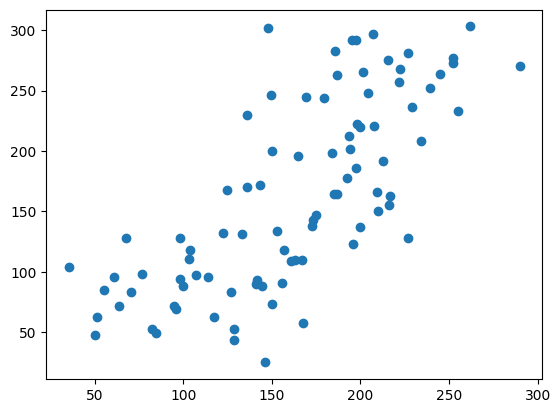

In [ ]:
import numpy as np
from sklearn import linear_model  # scikit-learn 모듈을 가져오기
from sklearn import datasets
import matplotlib.pyplot as plt

diabetes = datasets.load_diabetes()

# 학습 데이터와 테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print(regr.coef_, regr.intercept_)

y_pred = regr.predict(X_test)

plt.scatter(y_pred, y_test)
plt.show()

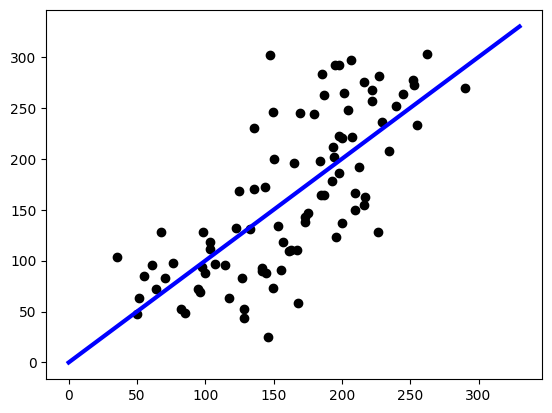

In [ ]:
plt.scatter(y_pred, y_test,  color='black')
x = np.linspace(0, 330, 100)  # 특정 구간의 점
plt.plot(x, x, linewidth = 3, color = 'blue')
plt.show()

### 알고리즘이 갖는 오차

In [ ]:
from sklearn.metrics import mean_squared_error

print('Mean squared error:', mean_squared_error(y_test, y_pred))

Mean squared error: 2796.7897495508737


## 기대수명 예측

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
life = pd.read_csv("/content/drive/MyDrive/Data/life_expectancy.csv")
print(life.head())
print(life.shape)
print(life.dtypes)

       Country  Year      Status  Life expectancy  Adult mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   Infant deaths  Alcohol  Percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total expenditure  Diphtheria   HIV/AIDS         GDP  Population  \
0    6.0            

In [ ]:
life = life[['Life expectancy', 'Year', 'Alcohol',
             'Percentage expenditure', 'Total expenditure',
             'Hepatitis B', 'Measles', 'Polio', 'BMI', 'GDP',
             'Thinness 1-19 years', 'Thinness 5-9 years']]
print(life)

      Life expectancy  Year  Alcohol  Percentage expenditure  \
0                65.0  2015     0.01               71.279624   
1                59.9  2014     0.01               73.523582   
2                59.9  2013     0.01               73.219243   
3                59.5  2012     0.01               78.184215   
4                59.2  2011     0.01                7.097109   
...               ...   ...      ...                     ...   
2933             44.3  2004     4.36                0.000000   
2934             44.5  2003     4.06                0.000000   
2935             44.8  2002     4.43                0.000000   
2936             45.3  2001     1.72                0.000000   
2937             46.0  2000     1.68                0.000000   

      Total expenditure  Hepatitis B  Measles  Polio   BMI         GDP  \
0                  8.16         65.0     1154    6.0  19.1  584.259210   
1                  8.18         62.0      492   58.0  18.6  612.696514   
2        

In [ ]:
print(life.shape)
print(life.isnull().sum())

(2938, 12)
Life expectancy            10
Year                        0
Alcohol                   194
Percentage expenditure      0
Total expenditure         226
Hepatitis B               553
Measles                     0
Polio                      19
BMI                        34
GDP                       448
Thinness 1-19 years        34
Thinness 5-9 years         34
dtype: int64


In [ ]:
life.dropna(inplace = True)
print(life.shape)

(1853, 12)


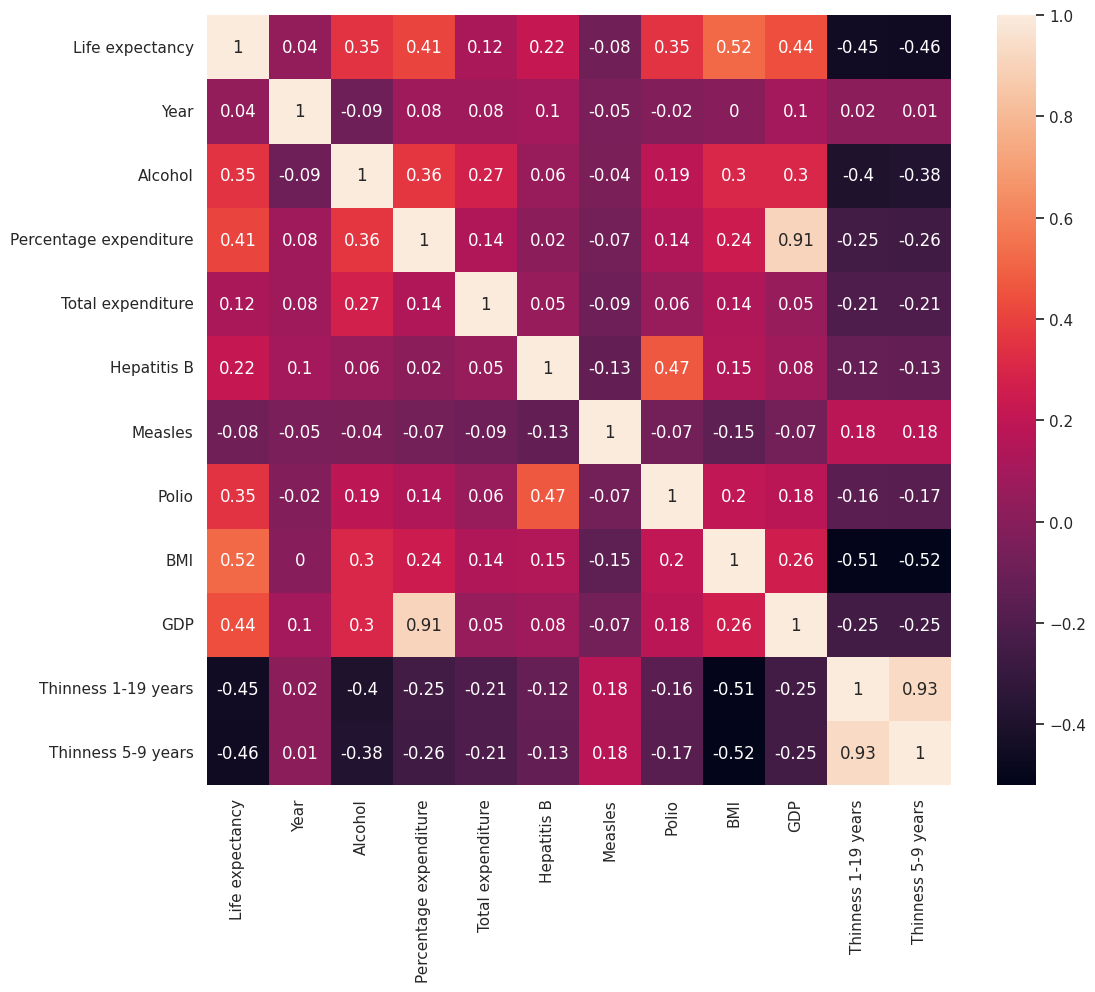

In [ ]:
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,10)})
correlation_matrix = life.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

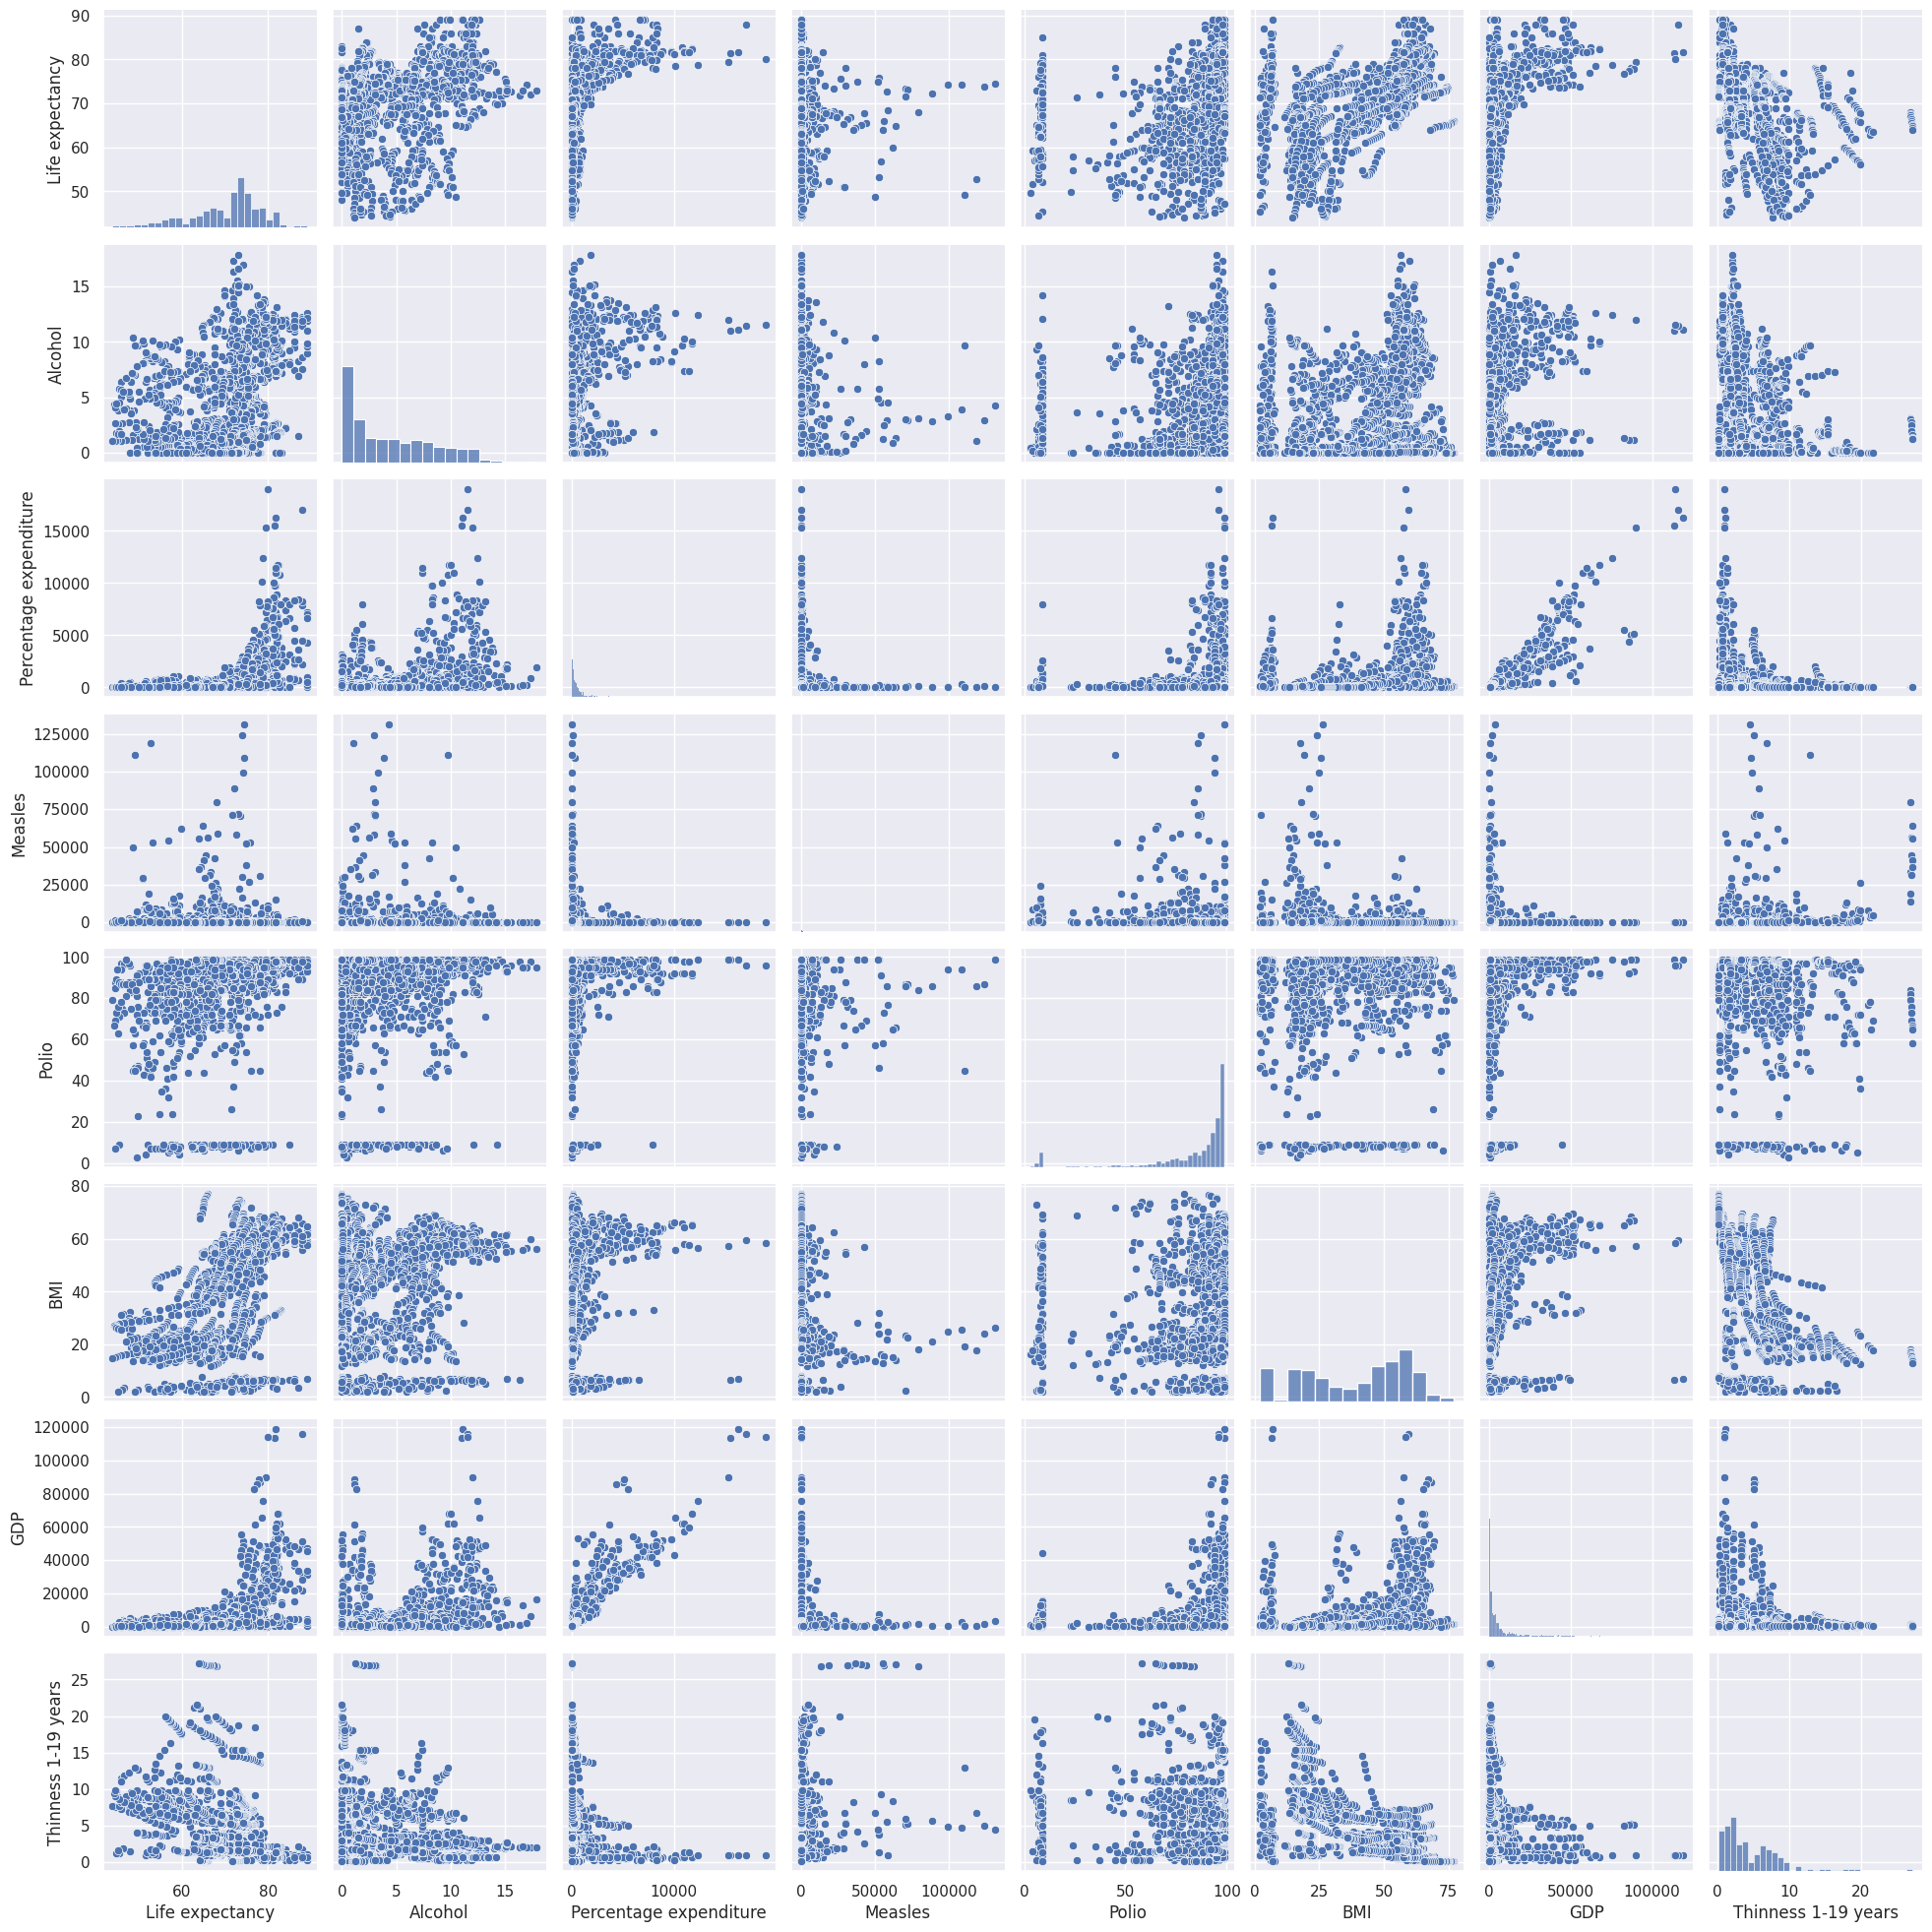

In [ ]:
sns.pairplot(life[['Life expectancy', 'Alcohol', 'Percentage expenditure',
             'Measles', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']])
plt.show()

In [ ]:
X = life[['Alcohol', 'Percentage expenditure', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
print(lin_model.coef_, lin_model.intercept_)
y_test_predict = lin_model.predict(X_test)

[ 1.32753987e-01  2.52070279e-04  7.68140854e-02  1.36124754e-01
  1.45338186e-04 -3.10558160e-01] 57.87032167505281


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
print('RMSE =', rmse)

RMSE = 6.189664901916929


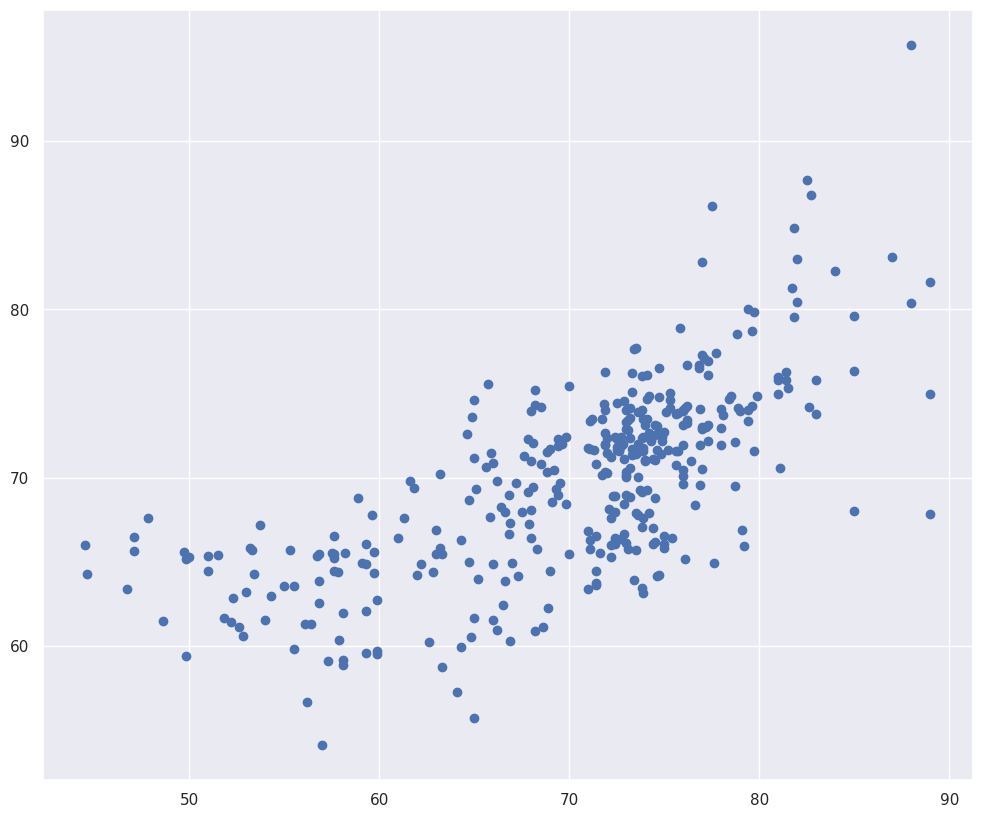

In [ ]:
plt.scatter(y_test, y_test_predict)
plt.show()

## 보스턴 집값 데이터 읽고 결측 확인

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns    # 시각화를 위하여 Seaborn 라이브러리를 이용함

from sklearn.datasets import load_boston
boston = load_boston()

df = pd.DataFrame(boston.data, columns=boston.feature_names)
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
df['MEDV'] = boston.target

In [ ]:
print( df.isnull().sum() )

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


### 각 특징들 사이의 상관관계

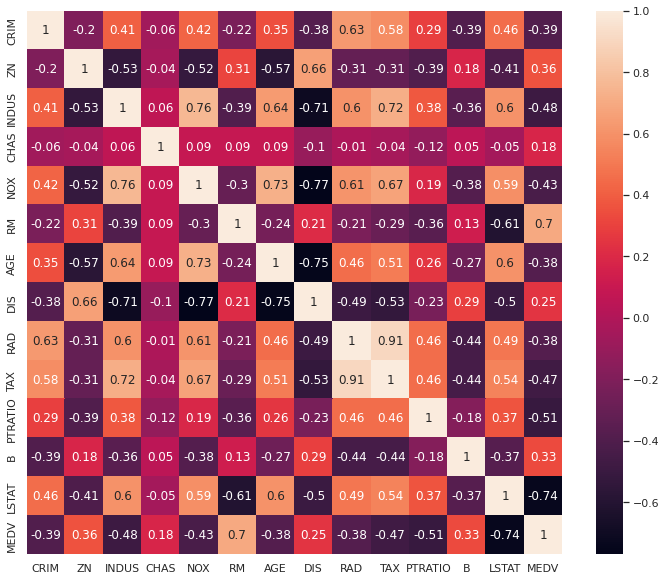

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

### 어떤 특징들이 서로 상관관계가 있을까?

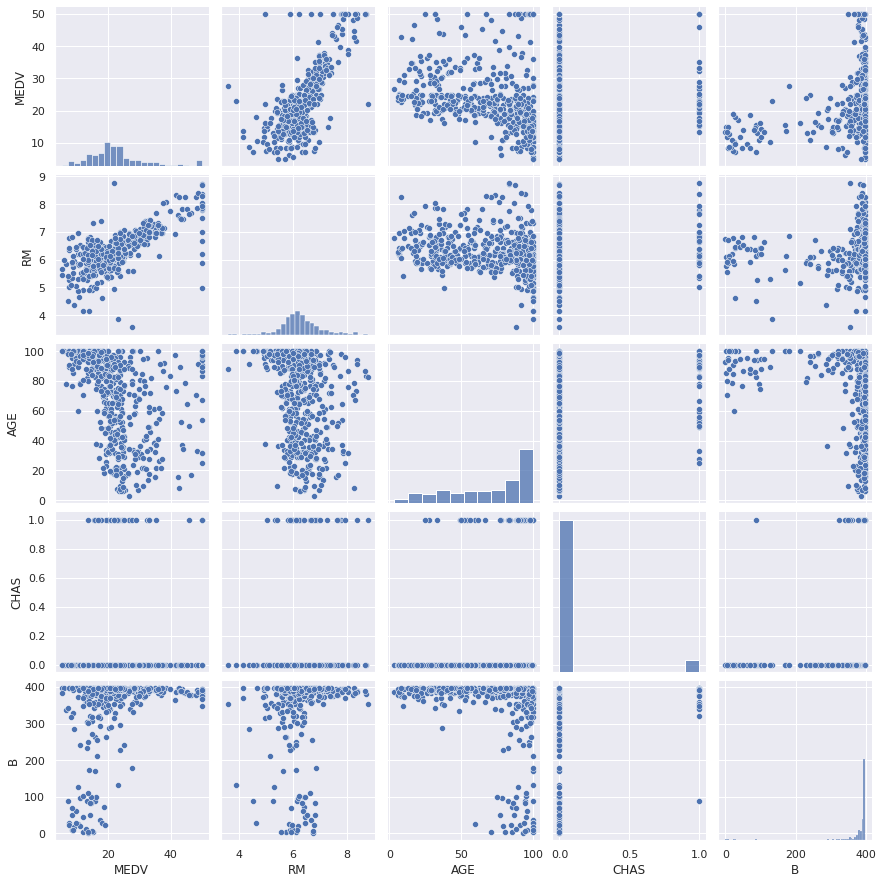

In [ ]:
sns.pairplot(df[["MEDV", "RM", "AGE", "CHAS", "B"]])
plt.show()

### 간단한 회귀모델

In [ ]:
X = df[['LSTAT', 'RM']]
y = df['MEDV']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_test_predict = lin_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
print('RMSE =', rmse)

RMSE = 5.27447016521602
